In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import chardet

# Reading Data

In [6]:
with open("companies.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
    
# check the character encoding
print(result)

{'encoding': 'utf-8', 'confidence': 0.7525, 'language': ''}


In [25]:
# Create companies Dataframe with latin1 encoding
companies = pd.read_csv("companies.csv", encoding='latin1')

# Create rounds2 Dataframe
rounds2 = pd.read_csv("rounds2.csv", encoding='latin1')

In [10]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


# Data Exploration

In [13]:
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/Organization/Ä°Novatiff-Reklam-Ve-Tanä±Tä±M-H...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [14]:
companies.shape

(66368, 10)

In [15]:
companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [16]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [18]:
companies.describe(include="all")

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Zerto,Blink,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [20]:
len(companies.permalink.unique())

66368

In [31]:
# Create new column "company_name" and insert value from Taking out company name from permalink values 
# Convert all the values to lower case
companies["company_name"] = companies['permalink'].apply(lambda x : x[14:].lower())

In [32]:
# Remove "-" special character from new column company name
companies["company_name"] = companies['company_name'].apply(lambda x : x[1:] if x[0] == "-" else x)

In [33]:
# Number of companies in companies Dataframe
companies["company_name"].value_counts()

cardiac-dimensions    1
positionly            1
msi-security          1
beautifeye            1
zeenworld             1
                     ..
sandlinks             1
biodata               1
72798-com             1
bethere               1
flocktory             1
Name: company_name, Length: 66368, dtype: int64

In [26]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [27]:
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/ORGANIZATION/ÃASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


In [28]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [30]:
rounds2.describe(include="all")

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
count,114949,114949,114949,31140,114949,9.495900e+04
unique,90247,114949,14,8,5033,NaN
top,/ORGANIZATION/SOLARFLARE,/funding-round/59f86444dcf42082dc3c1b53d08b8d89,venture,A,01-01-2014,NaN
freq,10,1,55494,14747,779,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.042687e+07
std,NaN,NaN,NaN,NaN,NaN,1.148212e+08
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,3.225000e+05
50%,NaN,NaN,NaN,NaN,NaN,1.680511e+06
75%,NaN,NaN,NaN,NaN,NaN,7.000000e+06


In [34]:
# Create new column "company_name" and insert value from Taking out company name from company_permalink values 
# Convert all the values to lower case
rounds2["company_name"] = rounds2['company_permalink'].apply(lambda x : x[14:].lower())

In [35]:
# Remove "-" special character from new column company name
rounds2["company_name"] = rounds2['company_name'].apply(lambda x : x[1:] if x[0] == "-" else x)

In [37]:
# Number of companies in rounds2 Dataframe
rounds2["company_name"].value_counts()

solarflare               19
exagen-diagnostics       18
semprius                 18
quellan                  18
endogastric-solutions    17
                         ..
pext                      1
yestodate-com             1
rxapps                    1
smartpocket               1
q-bot                     1
Name: company_name, Length: 66370, dtype: int64

In [38]:
# Unique values in companies_name column in round2 Dataframe
len(rounds2.company_name.unique())

66370

In [39]:
rounds2.company_name.isnull().sum()

0

In [41]:
companies.company_name.isnull().sum()

0

In [43]:
# Unique values in companies_name column in companies Dataframe
len(companies.company_name.unique())

66368

In [44]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_name
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,fame
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,qounter
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,the-one-of-them-inc-
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,0-6-com
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies


In [45]:
# Merge the two data frames (companies and rounds2)
master_frame = pd.merge(companies,rounds2, left_on='company_name', right_on='company_name', how='inner')

In [46]:
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_name,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,fame,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,qounter,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,qounter,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,the-one-of-them-inc-,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,0-6-com,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [48]:
companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'company_name'],
      dtype='object')

In [49]:
rounds2.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'company_name'],
      dtype='object')

In [50]:
master_frame.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'company_name', 'company_permalink', 'funding_round_permalink',
       'funding_round_type', 'funding_round_code', 'funded_at',
       'raised_amount_usd'],
      dtype='object')

In [51]:
master_frame.shape

(114942, 17)

# Data Cleaning

In [52]:
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
company_name                   0
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
dtype: int64

In [53]:
master_frame1 = master_frame[(master_frame.funding_round_type == 'venture') | (master_frame.funding_round_type == 'angel') | (master_frame.funding_round_type == 'seed') | (master_frame.funding_round_type == 'private_equity')]

In [54]:
master_frame.shape

(114942, 17)

In [55]:
master_frame.funding_round_type.value_counts()

venture                  55493
seed                     30518
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [56]:
master_frame1.shape

(94390, 17)

In [57]:
master_frame1.funding_round_type.value_counts()

venture           55493
seed              30518
angel              6094
private_equity     2285
Name: funding_round_type, dtype: int64

In [58]:
(master_frame1.funding_round_type == 'venture').describe()

count     94390
unique        2
top        True
freq      55493
Name: funding_round_type, dtype: object

In [59]:
master_frame1.raised_amount_usd.isnull().sum()

13764

In [61]:
# Percentage of missing values (column-wise)
round(100*(master_frame1.isnull().sum()/len(master_frame1.index)),2)

permalink                   0.00
name                        0.00
homepage_url                4.39
category_list               2.64
status                      0.00
country_code                7.75
state_code                  9.82
region                      9.06
city                        9.06
founded_at                 17.71
company_name                0.00
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         67.03
funded_at                   0.00
raised_amount_usd          14.58
dtype: float64

In [62]:
master_frame1.raised_amount_usd.describe()

count    8.062600e+04
mean     9.348091e+06
std      7.562986e+07
min      0.000000e+00
25%      4.000000e+05
50%      2.000000e+06
75%      7.976016e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

In [63]:
master_frame1[master_frame1.raised_amount_usd.isnull()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_name,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,qounter,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
5,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,004-technologies,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN
33,/Organization/1000Lookz,1000Lookz,http://1000lookz.com,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,1000lookz,/ORGANIZATION/1000LOOKZ,/funding-round/e07f6e580046d00c7aeb33fafb9d90a3,venture,NaN,22-07-2013,NaN
42,/Organization/1000Museums-Com,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,01-01-2008,1000museums-com,/organization/1000museums-com,/funding-round/adf2f3272af9f552b87e01f10f0b9234,venture,NaN,01-02-2014,NaN
51,/Organization/1006-Tv,1006.tv,http://www.1006.tv/,Games|Media,operating,CHN,22,Beijing,Beijing,01-01-2009,1006-tv,/ORGANIZATION/1006-TV,/funding-round/a3631227d5232aa8c2303f252c4f1f87,angel,NaN,01-01-2011,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114892,/Organization/Zymr-Inc-,"Zymr, Inc.",http://www.zymr.com,Android|Apps|Cloud Computing|Cloud Infrastruct...,operating,USA,CA,SF Bay Area,Santa Clara,NaN,zymr-inc-,/ORGANIZATION/ZYMR-INC-,/funding-round/9048d1a80edeae803ed1790c9f473eec,angel,NaN,12-12-2012,NaN
114898,/Organization/Zynergy-Projects-Services,Zynergy Projects & Services,http://www.zynergygroup.net/,Clean Technology,operating,IND,25,Chennai,Chennai,NaN,zynergy-projects-services,/ORGANIZATION/ZYNERGY-PROJECTS-SERVICES,/funding-round/3d7dbd2d92220d93e2b5455f914a0918,venture,NaN,19-08-2015,NaN
114906,/Organization/Zynga,Zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,01-07-2007,zynga,/ORGANIZATION/ZYNGA,/funding-round/d27f10a20b15b4ef3d9961d54eabf6b1,angel,NaN,01-01-2007,NaN
114920,/Organization/Zypsee,Whisk (formerly Zypsee),http://whisk.me,Public Transportation,operating,USA,NY,New York City,New York,01-01-2011,zypsee,/ORGANIZATION/ZYPSEE,/funding-round/c67e22c5448435adaf5a2d101e449dde,seed,NaN,26-07-2013,NaN


In [68]:
master_frame1.isnull().all(axis=1).sum()

0

In [70]:
master_frame1.loc[:,['raised_amount_usd']].describe()

,raised_amount_usd
count,8.062600e+04
mean,9.348091e+06
std,7.562986e+07
min,0.000000e+00
25%,4.000000e+05
50%,2.000000e+06
75%,7.976016e+06
max,1.760000e+10


In [72]:
# removing NaN raised_amount_usd rows
master_frame2 = master_frame1[~master_frame1.raised_amount_usd.isnull()]

In [74]:
master_frame2.raised_amount_usd.isnull().sum()

0

In [76]:
master_frame1.shape

(94390, 17)

In [77]:
master_frame2.shape

(80626, 17)

In [79]:
means = master_frame2.groupby('funding_round_type')['raised_amount_usd'].mean()

In [80]:
means

funding_round_type
angel             9.586945e+05
private_equity    7.330859e+07
seed              7.197796e+05
venture           1.174895e+07
Name: raised_amount_usd, dtype: float64

In [82]:
means = master_frame2.groupby('funding_round_type')['raised_amount_usd'].mean()

In [83]:
median = master_frame2.groupby('funding_round_type')['raised_amount_usd'].median()

In [84]:
median

funding_round_type
angel               400000.0
private_equity    20000000.0
seed                275000.0
venture            5000000.0
Name: raised_amount_usd, dtype: float64

In [85]:
quantile_50 = master_frame2.groupby('funding_round_type')['raised_amount_usd'].quantile(0.5)

In [86]:
quantile_50

funding_round_type
angel               400000.0
private_equity    20000000.0
seed                275000.0
venture            5000000.0
Name: raised_amount_usd, dtype: float64

In [87]:
quantile_25 = master_frame2.groupby('funding_round_type')['raised_amount_usd'].quantile(0.25)

In [88]:
quantile_25

funding_round_type
angel              150000.00
private_equity    5000000.00
seed                55000.00
venture           1600901.75
Name: raised_amount_usd, dtype: float64

In [89]:
quantile_75 = master_frame2.groupby('funding_round_type')['raised_amount_usd'].quantile(0.75)

In [90]:
quantile_75

funding_round_type
angel              1000000.0
private_equity    75000000.0
seed               1000000.0
venture           12000000.0
Name: raised_amount_usd, dtype: float64

In [92]:
max = master_frame2.groupby('funding_round_type')['raised_amount_usd'].max()

In [93]:
max

funding_round_type
angel             4.945120e+08
private_equity    4.745460e+09
seed              2.000000e+08
venture           1.760000e+10
Name: raised_amount_usd, dtype: float64

# Country Analysis

In [94]:
master_frame2.country_code.value_counts()

USA    51868
GBR     4075
CAN     2208
CHN     1826
IND     1574
       ...  
UZB        1
SOM        1
ZWE        1
SYC        1
SEN        1
Name: country_code, Length: 131, dtype: int64

In [95]:
master_frame2.country_code.unique()

array(['IND', 'USA', nan, 'CHN', 'CAN', 'CHL', 'GBR', 'FRA', 'AUS', 'ROM',
       'KOR', 'NLD', 'SWE', 'RUS', 'DNK', 'NOR', 'ESP', 'BEL', 'IRL',
       'ITA', 'ISR', 'SGP', 'CHE', 'BRA', 'SVN', 'JOR', 'HUN', 'JPN',
       'DEU', 'NGA', 'FIN', 'NZL', 'HKG', 'CYP', 'CRI', 'IDN', 'PRT',
       'ARG', 'TWN', 'THA', 'COL', 'SVK', 'UKR', 'LTU', 'ISL', 'MEX',
       'TUR', 'VEN', 'URY', 'AUT', 'KEN', 'ZAF', 'PHL', 'MNE', 'MYS',
       'PER', 'POL', 'EGY', 'PAN', 'LVA', 'GGY', 'VNM', 'HRV', 'EST',
       'BGR', 'LBN', 'GRC', 'UGA', 'NPL', 'LUX', 'CZE', 'ARE', 'SAU',
       'PAK', 'IRN', 'ALB', 'BAH', 'ARM', 'BGD', 'MDA', 'GHA', 'SRB',
       'TUN', 'ZWE', 'BRB', 'NIC', 'TAN', 'PRI', 'TTO', 'CMR', 'CYM',
       'ECU', 'SLV', 'BWA', 'MLT', 'GTM', 'ZMB', 'GIB', 'BHR', 'BMU',
       'HND', 'MUS', 'MCO', 'MMR', 'KAZ', 'QAT', 'MAR', 'LIE', 'BLR',
       'GEO', 'DOM', 'DZA', 'JAM', 'KNA', 'AZE', 'SEN', 'RWA', 'DMA',
       'UZB', 'PSE', 'KWT', 'CIV', 'BLM', 'GRD', 'KHM', 'LAO', 'SOM',
       'MKD', '

In [97]:
invest_venture = master_frame2[master_frame2.funding_round_type == 'venture']

In [98]:
invest_venture.funding_round_type.value_counts()

venture    50228
Name: funding_round_type, dtype: int64

In [99]:
invest_venture.country_code.unique()

array(['IND', nan, 'CHN', 'CAN', 'USA', 'GBR', 'FRA', 'ROM', 'KOR', 'IRL',
       'SWE', 'SGP', 'NLD', 'RUS', 'BEL', 'ESP', 'HUN', 'JPN', 'DEU',
       'ITA', 'HKG', 'BRA', 'FIN', 'CHE', 'PRT', 'SVN', 'THA', 'DNK',
       'TWN', 'ISR', 'NOR', 'LTU', 'ISL', 'MEX', 'AUS', 'NZL', 'AUT',
       'ARG', 'PHL', 'MNE', 'MYS', 'TUR', 'POL', 'LVA', 'GGY', 'EST',
       'LBN', 'GRC', 'IDN', 'CYP', 'SVK', 'ARE', 'EGY', 'ARM', 'ZAF',
       'TUN', 'KEN', 'COL', 'CZE', 'CMR', 'PRI', 'CYM', 'PER', 'ECU',
       'CHL', 'NGA', 'VNM', 'URY', 'PAK', 'HRV', 'LUX', 'UKR', 'BMU',
       'MUS', 'BGR', 'TTO', 'PAN', 'MMR', 'JOR', 'KAZ', 'MAR', 'LIE',
       'GTM', 'SAU', 'TAN', 'KNA', 'SEN', 'MLT', 'MCO', 'BAH', 'GHA',
       'KWT', 'UGA', 'LAO', 'BGD', 'BWA', 'MAF', 'GIB'], dtype=object)

In [100]:
country_list = invest_venture.country_code.unique().tolist()

In [101]:
print(country_list)

['IND', nan, 'CHN', 'CAN', 'USA', 'GBR', 'FRA', 'ROM', 'KOR', 'IRL', 'SWE', 'SGP', 'NLD', 'RUS', 'BEL', 'ESP', 'HUN', 'JPN', 'DEU', 'ITA', 'HKG', 'BRA', 'FIN', 'CHE', 'PRT', 'SVN', 'THA', 'DNK', 'TWN', 'ISR', 'NOR', 'LTU', 'ISL', 'MEX', 'AUS', 'NZL', 'AUT', 'ARG', 'PHL', 'MNE', 'MYS', 'TUR', 'POL', 'LVA', 'GGY', 'EST', 'LBN', 'GRC', 'IDN', 'CYP', 'SVK', 'ARE', 'EGY', 'ARM', 'ZAF', 'TUN', 'KEN', 'COL', 'CZE', 'CMR', 'PRI', 'CYM', 'PER', 'ECU', 'CHL', 'NGA', 'VNM', 'URY', 'PAK', 'HRV', 'LUX', 'UKR', 'BMU', 'MUS', 'BGR', 'TTO', 'PAN', 'MMR', 'JOR', 'KAZ', 'MAR', 'LIE', 'GTM', 'SAU', 'TAN', 'KNA', 'SEN', 'MLT', 'MCO', 'BAH', 'GHA', 'KWT', 'UGA', 'LAO', 'BGD', 'BWA', 'MAF', 'GIB']


In [102]:
invest_venture.country_code.isnull().sum()

2117

In [107]:
# removing NaN countries rows from venture investment dataframe
invest_venture2 = invest_venture[~invest_venture.country_code.isnull()]

In [108]:
invest_venture2.country_code.isnull().sum()

0

In [109]:
invest_venture2.country_code.unique()

array(['IND', 'CHN', 'CAN', 'USA', 'GBR', 'FRA', 'ROM', 'KOR', 'IRL',
       'SWE', 'SGP', 'NLD', 'RUS', 'BEL', 'ESP', 'HUN', 'JPN', 'DEU',
       'ITA', 'HKG', 'BRA', 'FIN', 'CHE', 'PRT', 'SVN', 'THA', 'DNK',
       'TWN', 'ISR', 'NOR', 'LTU', 'ISL', 'MEX', 'AUS', 'NZL', 'AUT',
       'ARG', 'PHL', 'MNE', 'MYS', 'TUR', 'POL', 'LVA', 'GGY', 'EST',
       'LBN', 'GRC', 'IDN', 'CYP', 'SVK', 'ARE', 'EGY', 'ARM', 'ZAF',
       'TUN', 'KEN', 'COL', 'CZE', 'CMR', 'PRI', 'CYM', 'PER', 'ECU',
       'CHL', 'NGA', 'VNM', 'URY', 'PAK', 'HRV', 'LUX', 'UKR', 'BMU',
       'MUS', 'BGR', 'TTO', 'PAN', 'MMR', 'JOR', 'KAZ', 'MAR', 'LIE',
       'GTM', 'SAU', 'TAN', 'KNA', 'SEN', 'MLT', 'MCO', 'BAH', 'GHA',
       'KWT', 'UGA', 'LAO', 'BGD', 'BWA', 'MAF', 'GIB'], dtype=object)

In [112]:
country_list = invest_venture2.country_code.unique().tolist()

In [113]:
print(country_list)

['IND', 'CHN', 'CAN', 'USA', 'GBR', 'FRA', 'ROM', 'KOR', 'IRL', 'SWE', 'SGP', 'NLD', 'RUS', 'BEL', 'ESP', 'HUN', 'JPN', 'DEU', 'ITA', 'HKG', 'BRA', 'FIN', 'CHE', 'PRT', 'SVN', 'THA', 'DNK', 'TWN', 'ISR', 'NOR', 'LTU', 'ISL', 'MEX', 'AUS', 'NZL', 'AUT', 'ARG', 'PHL', 'MNE', 'MYS', 'TUR', 'POL', 'LVA', 'GGY', 'EST', 'LBN', 'GRC', 'IDN', 'CYP', 'SVK', 'ARE', 'EGY', 'ARM', 'ZAF', 'TUN', 'KEN', 'COL', 'CZE', 'CMR', 'PRI', 'CYM', 'PER', 'ECU', 'CHL', 'NGA', 'VNM', 'URY', 'PAK', 'HRV', 'LUX', 'UKR', 'BMU', 'MUS', 'BGR', 'TTO', 'PAN', 'MMR', 'JOR', 'KAZ', 'MAR', 'LIE', 'GTM', 'SAU', 'TAN', 'KNA', 'SEN', 'MLT', 'MCO', 'BAH', 'GHA', 'KWT', 'UGA', 'LAO', 'BGD', 'BWA', 'MAF', 'GIB']


In [114]:
country_list_eng = ['IND','PAK',
'RWA',
'UGA',
'MLT',
'NRU',
'NAM',
'ZWE',
'ATG',
'BHS',
'BLZ',
'BRB',
'DMA',
'GUY',
'JAM',
'KNA',
'LBR',
'LCA',
'PNG',
'SLE',
'TTO',
'VCT',
'ZAF',
'PHL',
'GRD',
'CAN',
'KEN',
'IRL',
'SGP',
'FJI',
'GHA',
'NGA',
'AUS',
'NZL',
'GBR',
'USA']

In [115]:
print(country_list_eng)

['IND', 'PAK', 'RWA', 'UGA', 'MLT', 'NRU', 'NAM', 'ZWE', 'ATG', 'BHS', 'BLZ', 'BRB', 'DMA', 'GUY', 'JAM', 'KNA', 'LBR', 'LCA', 'PNG', 'SLE', 'TTO', 'VCT', 'ZAF', 'PHL', 'GRD', 'CAN', 'KEN', 'IRL', 'SGP', 'FJI', 'GHA', 'NGA', 'AUS', 'NZL', 'GBR', 'USA']


In [116]:
funding_country_list = list(set(country_list).intersection(country_list_eng))

In [117]:
print(funding_country_list)

['USA', 'AUS', 'MLT', 'CAN', 'KEN', 'UGA', 'IND', 'NGA', 'GBR', 'ZAF', 'SGP', 'GHA', 'NZL', 'PHL', 'IRL', 'PAK', 'KNA', 'TTO']


In [118]:
# Delete non-english countries rows
invest_venture3 = invest_venture2[invest_venture2['country_code'].isin(funding_country_list)]

In [119]:
invest_venture3.country_code.value_counts()

USA    36139
GBR     2055
CAN     1256
IND      824
IRL      222
SGP      221
AUS      206
NZL       48
ZAF       23
NGA       15
PHL       13
KEN        7
PAK        7
TTO        3
MLT        3
GHA        3
KNA        1
UGA        1
Name: country_code, dtype: int64

In [120]:
invest_venture3.isnull().sum()

permalink                      0
name                           0
homepage_url                1936
category_list                229
status                         0
country_code                   0
state_code                   335
region                       185
city                         185
founded_at                  6736
company_name                   0
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         18840
funded_at                      0
raised_amount_usd              0
dtype: int64

In [135]:
# Total funding received by all the english countries
max_funding = invest_venture3.groupby('country_code')['raised_amount_usd'].sum()

In [136]:
# Total funding received by all the english countries
max_funding.sort_values(ascending=False)

country_code
USA    4.225108e+11
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
SGP    2.793918e+09
IRL    1.676131e+09
AUS    1.322935e+09
NZL    4.483164e+08
NGA    2.454400e+08
ZAF    2.340629e+08
PHL    1.144997e+08
PAK    8.312500e+07
KEN    5.394000e+07
GHA    3.120000e+07
MLT    1.772830e+07
KNA    1.500000e+07
TTO    8.500000e+06
UGA    2.500000e+06
Name: raised_amount_usd, dtype: float64

In [133]:
# Top 9 countries data frame
top9 = invest_venture3[invest_venture2['country_code'].isin(['USA','GBR','IND','CAN','SGP','IRL','AUS','NZL','NGA'])]

<ipython-input-133-07d32869e3df>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top9 = invest_venture3[invest_venture2['country_code'].isin(['USA','GBR','IND','CAN','SGP','IRL','AUS','NZL','NGA'])]


In [134]:
top9.country_code.value_counts()

USA    36139
GBR     2055
CAN     1256
IND      824
IRL      222
SGP      221
AUS      206
NZL       48
NGA       15
Name: country_code, dtype: int64

In [322]:
# Total funding received by top9 countries
max_funding = top9.groupby('country_code')['raised_amount_usd'].sum()

In [323]:
# Total funding received by top9 countries in decending order to identify Top three countries
max_funding.sort_values(ascending=False)

country_code
USA    4.225108e+11
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
SGP    2.793918e+09
IRL    1.676131e+09
AUS    1.322935e+09
NZL    4.483164e+08
NGA    2.454400e+08
Name: raised_amount_usd, dtype: float64

# Sector Analysis 1

In [137]:
mapping = pd.read_csv("mapping.csv")

In [138]:
top9.isnull().sum()

permalink                      0
name                           0
homepage_url                1934
category_list                228
status                         0
country_code                   0
state_code                   306
region                       180
city                         180
founded_at                  6721
company_name                   0
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         18809
funded_at                      0
raised_amount_usd              0
dtype: int64

In [139]:
top9_1 = top9[~top9.category_list.isnull()]

In [140]:
top9_1.isnull().sum()

permalink                      0
name                           0
homepage_url                1868
category_list                  0
status                         0
country_code                   0
state_code                   305
region                       178
city                         178
founded_at                  6563
company_name                   0
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         18705
funded_at                      0
raised_amount_usd              0
dtype: int64

In [145]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [146]:
# Store the value and id variables in two sepearte arrays
value_vars = list(mapping.columns[1:])
id_Vars = list(np.setdiff1d(mapping.columns, value_vars))

In [147]:
print(value_vars)

['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising']


In [148]:
print(id_Vars)

['category_list']


In [149]:
# Convert into long
mapping_long_df = pd.melt(mapping, id_vars = id_Vars, value_vars= value_vars)

In [150]:
mapping_long_df

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0
...,...,...,...
6187,Wholesale,"Social, Finance, Analytics, Advertising",0
6188,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
6189,Wireless,"Social, Finance, Analytics, Advertising",0
6190,Women,"Social, Finance, Analytics, Advertising",0


In [152]:
mapping_long_df[mapping_long_df.value == 1]

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
...,...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising",1
6122,Social Television,"Social, Finance, Analytics, Advertising",1
6123,Social Travel,"Social, Finance, Analytics, Advertising",1
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [153]:
mapping_long_df = mapping_long_df[mapping_long_df.value == 1]

In [154]:
mapping_long_df = mapping_long_df.drop('value', axis=1)

In [155]:
mapping_long_df

,category_list,variable
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising"
6122,Social Television,"Social, Finance, Analytics, Advertising"
6123,Social Travel,"Social, Finance, Analytics, Advertising"
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [157]:
# Renaming the variable column to main_sector
mapping_long_df = mapping_long_df.rename(columns={'variable': 'main_sector'})

In [158]:
mapping_long_df

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising"
6122,Social Television,"Social, Finance, Analytics, Advertising"
6123,Social Travel,"Social, Finance, Analytics, Advertising"
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [165]:
mapping_long_df[mapping_long_df.main_sector == '']

,category_list,main_sector


In [172]:
mapping_long_df[mapping_long_df.isnull().any(axis=1)]

,category_list,main_sector
688,NaN,Blanks


In [173]:
# Removing the null value in categroy list
mapping_long_df_1 = mapping_long_df[~mapping_long_df.isnull().any(axis=1)]

In [174]:
mapping_long_df_1[mapping_long_df_1.isnull().any(axis=1)]

,category_list,main_sector


In [175]:
mapping_long_df_1.isnull().sum()

category_list    0
main_sector      0
dtype: int64

In [176]:
mapping_long_df_1

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising"
6122,Social Television,"Social, Finance, Analytics, Advertising"
6123,Social Travel,"Social, Finance, Analytics, Advertising"
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [177]:
top9_1

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_name,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,fame,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
8,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,0ndine-biomedical-inc,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Biotechnology
10,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,0xdata,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,Analytics
11,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,0xdata,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,Analytics
12,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,0xdata,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,Analytics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114913,/Organization/Zyomyx-Inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,zyomyx-inc,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,12000000.0,Biotechnology
114915,/Organization/Zyomyx-Inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,zyomyx-inc,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0,Biotechnology
114916,/Organization/Zyomyx-Inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,zyomyx-inc,/ORGANIZATION/ZYOMYX-INC,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.0,Biotechnology
114927,/Organization/Zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,zyrra,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0,E-Commerce


In [178]:
top9_1.category_list.isnull().sum()

0

In [179]:
top9_1.category_list.value_counts()

Biotechnology                                                               4840
Software                                                                    3419
Health Care                                                                 1253
Clean Technology                                                            1113
Enterprise Software                                                         1058
                                                                            ... 
Communications Infrastructure|Internet of Things|Transportation|Wireless       1
Internet|Networking|Wireless                                                   1
Bio-Pharm|Pharmaceuticals|Therapeutics                                         1
Crowdfunding|Finance|FinTech|Startups|Technology|Venture Capital               1
Energy|Innovation Management|Technology                                        1
Name: category_list, Length: 8319, dtype: int64

In [186]:
top9_1['category_list'].astype(str)

0                 Media
8         Biotechnology
10            Analytics
11            Analytics
12            Analytics
              ...      
114913    Biotechnology
114915    Biotechnology
114916    Biotechnology
114927       E-Commerce
114929    Biotechnology
Name: category_list, Length: 40758, dtype: object

In [188]:
top9_1.category_list.apply(lambda x : x.replace("\n",""))

0                 Media
8         Biotechnology
10            Analytics
11            Analytics
12            Analytics
              ...      
114913    Biotechnology
114915    Biotechnology
114916    Biotechnology
114927       E-Commerce
114929    Biotechnology
Name: category_list, Length: 40758, dtype: object

In [191]:
top9_2 = top9_1[top9_1['category_list'].notnull()].copy()
top9_2['category_list'] = top9_2['category_list'].astype(str)

In [192]:
top9_2.shape

(40758, 18)

In [193]:
top9_1.shape

(40758, 18)

In [194]:
top9_2.category_list = top9_2.category_list.apply(lambda x : x.replace("\n",""))

In [195]:
top9_2['primary_sector'] = top9_2.category_list.apply(lambda x : x.split("|")[0])

In [197]:
top9_2.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_name,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
114913,/Organization/Zyomyx-Inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,zyomyx-inc,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,B,30-06-2013,12000000.0,Biotechnology
114915,/Organization/Zyomyx-Inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,zyomyx-inc,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,14219999.0,Biotechnology
114916,/Organization/Zyomyx-Inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,zyomyx-inc,/ORGANIZATION/ZYOMYX-INC,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,555016.0,Biotechnology
114927,/Organization/Zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,zyrra,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,140500.0,E-Commerce
114929,/Organization/Zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,zystor,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8500000.0,Biotechnology


In [208]:
top9_2[top9_2.state_code == 'WA']

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_name,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
129,/Organization/16-Mile-Solutions,16 Mile Solutions,NaN,Software,operating,USA,WA,Seattle,Seattle,01-01-2006,16-mile-solutions,/ORGANIZATION/16-MILE-SOLUTIONS,/funding-round/3a671cf6f08fe5d0a878f5627134384c,venture,NaN,11-06-2009,199957.0,Software
146,/Organization/180Solutions,180Solutions,NaN,Advertising|Advertising Platforms|Promotional,closed,USA,WA,Seattle,Bellevue,NaN,180solutions,/organization/180solutions,/funding-round/e55f5f2b9ee65826cc5bf2e1cc2eec9e,venture,A,05-04-2004,40000000.0,Advertising
167,/Organization/1Energy-Systems,1Energy Systems,http://1energysystems.com,Software,operating,USA,WA,Seattle,Seattle,01-01-2010,1energy-systems,/ORGANIZATION/1ENERGY-SYSTEMS,/funding-round/0502de190cb6fd03ba9435767080bcdb,venture,NaN,22-04-2013,1450000.0,Software
327,/Organization/2Nd-Watch,2nd Watch,http://2ndwatch.com,Cloud Infrastructure|Corporate IT|Enterprise S...,operating,USA,WA,Seattle,Seattle,01-01-2010,2nd-watch,/ORGANIZATION/2ND-WATCH,/funding-round/08108acd1a58480a1331ee7d4bc9abda,venture,C,14-10-2014,10000000.0,Cloud Infrastructure
328,/Organization/2Nd-Watch,2nd Watch,http://2ndwatch.com,Cloud Infrastructure|Corporate IT|Enterprise S...,operating,USA,WA,Seattle,Seattle,01-01-2010,2nd-watch,/organization/2nd-watch,/funding-round/6896177b78d57e903be44fd6a199f88b,venture,NaN,06-12-2011,490000.0,Cloud Infrastructure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114759,/Organization/Zulily,zulily,http://www.zulily.com,Babies|E-Commerce|Flash Sales|Kids|Retail|Spec...,acquired,USA,WA,Seattle,Seattle,01-01-2010,zulily,/organization/zulily,/funding-round/231238fae1987c6c11b45ef6c2f12d2c,venture,A,17-12-2009,4600000.0,Babies
114760,/Organization/Zulily,zulily,http://www.zulily.com,Babies|E-Commerce|Flash Sales|Kids|Retail|Spec...,acquired,USA,WA,Seattle,Seattle,01-01-2010,zulily,/ORGANIZATION/ZULILY,/funding-round/80316213cd2b73841ca57592b838b01a,venture,C,11-08-2011,43000000.0,Babies
114761,/Organization/Zulily,zulily,http://www.zulily.com,Babies|E-Commerce|Flash Sales|Kids|Retail|Spec...,acquired,USA,WA,Seattle,Seattle,01-01-2010,zulily,/organization/zulily,/funding-round/c1175b564b8b82aabf53839234e4bc39,venture,B,04-08-2010,6000000.0,Babies
114762,/Organization/Zulily,zulily,http://www.zulily.com,Babies|E-Commerce|Flash Sales|Kids|Retail|Spec...,acquired,USA,WA,Seattle,Seattle,01-01-2010,zulily,/ORGANIZATION/ZULILY,/funding-round/fe4ecba4141a1b51886811cebd1f91b8,venture,D,15-11-2012,85000000.0,Babies


In [209]:
# Merging top9 and mapping dataframe
master = pd.merge(top9_2,mapping_long_df_1, how="inner", left_on="primary_sector", right_on="category_list")

In [210]:
top9_2.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'company_name', 'company_permalink', 'funding_round_permalink',
       'funding_round_type', 'funding_round_code', 'funded_at',
       'raised_amount_usd', 'primary_sector'],
      dtype='object')

In [211]:
mapping_long_df_1.columns

Index(['category_list', 'main_sector'], dtype='object')

In [212]:
master.columns

Index(['permalink', 'name', 'homepage_url', 'category_list_x', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'company_name', 'company_permalink', 'funding_round_permalink',
       'funding_round_type', 'funding_round_code', 'funded_at',
       'raised_amount_usd', 'primary_sector', 'category_list_y',
       'main_sector'],
      dtype='object')

In [215]:
master = master.rename(columns={'category_list_x': 'category_list'})

In [216]:
master.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'company_name', 'company_permalink', 'funding_round_permalink',
       'funding_round_type', 'funding_round_code', 'funded_at',
       'raised_amount_usd', 'primary_sector', 'main_sector'],
      dtype='object')

In [218]:
master.isnull().sum()

permalink                      0
name                           0
homepage_url                1796
category_list                  0
status                         0
country_code                   0
state_code                   289
region                       175
city                         175
founded_at                  6263
company_name                   0
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         17686
funded_at                      0
raised_amount_usd              0
primary_sector                 0
main_sector                    0
dtype: int64

In [219]:
master.funding_round_type.value_counts()

venture    38026
Name: funding_round_type, dtype: int64

In [336]:
# Top three English speaking countries seprate dataframes, D1: USA, D2: GBR, D3: IND
# Investement funding within the 5-15 million USD range
# Funding type "venture"
D1 = master[(master.country_code == 'USA') & (master.raised_amount_usd > 5000000) & (master.raised_amount_usd < 15000000)]
D2 = master[(master.country_code == 'GBR') & (master.raised_amount_usd > 5000000) & (master.raised_amount_usd < 15000000)]
D3 = master[(master.country_code == 'IND') & (master.raised_amount_usd > 5000000) & (master.raised_amount_usd < 15000000)]

In [221]:
D1.country_code.value_counts()

USA    9227
Name: country_code, dtype: int64

In [222]:
D2.country_code.value_counts()

GBR    524
Name: country_code, dtype: int64

In [337]:
D3.country_code.value_counts()

IND    222
Name: country_code, dtype: int64

In [225]:
# Total number of investments (count) for D1 country
D1.shape

(9227, 19)

In [226]:
# Total number of investments (count) for D2 country
D2.shape

(524, 19)

In [333]:
# Total number of investments (count) for D3 country
D3.shape

(222, 19)

In [228]:
D1.isnull().sum()

permalink                     0
name                          0
homepage_url                457
category_list                 0
status                        0
country_code                  0
state_code                    2
region                        9
city                          9
founded_at                 1341
company_name                  0
company_permalink             0
funding_round_permalink       0
funding_round_type            0
funding_round_code         2765
funded_at                     0
raised_amount_usd             0
primary_sector                0
main_sector                   0
dtype: int64

In [229]:
D2.isnull().sum()

permalink                    0
name                         0
homepage_url                24
category_list                0
status                       0
country_code                 0
state_code                  13
region                      27
city                        27
founded_at                 112
company_name                 0
company_permalink            0
funding_round_permalink      0
funding_round_type           0
funding_round_code         198
funded_at                    0
raised_amount_usd            0
primary_sector               0
main_sector                  0
dtype: int64

In [338]:
D3.isnull().sum()

permalink                   0
name                        0
homepage_url                2
category_list               0
status                      0
country_code                0
state_code                  0
region                      0
city                        0
founded_at                 32
company_name                0
company_permalink           0
funding_round_permalink     0
funding_round_type          0
funding_round_code         67
funded_at                   0
raised_amount_usd           0
primary_sector              0
main_sector                 0
dtype: int64

In [231]:
# Total amount of investment (USD) for D1 country
D1.raised_amount_usd.sum()

82391524549.0

In [232]:
# Total amount of investment (USD) for D2 country
D2.raised_amount_usd.sum()

4593704358.0

In [339]:
# Total amount of investment (USD) for D3 country
D3.raised_amount_usd.sum()

1998537552.0

In [236]:
# Top sector (based on sum of investments) for D1 country
top_sector_D1 = D1.groupby(['main_sector'])['raised_amount_usd'].sum()

In [237]:
# Sorting them in descending order
top_sector_D1.sort_values(ascending=False)

main_sector
Others                                     2.153428e+10
Cleantech / Semiconductors                 1.779600e+10
Social, Finance, Analytics, Advertising    1.359070e+10
News, Search and Messaging                 1.107682e+10
Health                                     6.855859e+09
Manufacturing                              6.228553e+09
Entertainment                              4.040213e+09
Automotive & Sports                        1.269104e+09
Name: raised_amount_usd, dtype: float64

In [353]:
# Top sector (based on sum of investments) for D2 country
top_sector_D2 = D2.groupby(['main_sector'])['raised_amount_usd'].sum()

In [354]:
# Sorting them in descending order
top_sector_D2.sort_values(ascending=False)

main_sector
Cleantech / Semiconductors                 1.096905e+09
Others                                     1.094124e+09
Social, Finance, Analytics, Advertising    7.568884e+08
News, Search and Messaging                 5.657462e+08
Entertainment                              4.015111e+08
Manufacturing                              3.319403e+08
Health                                     2.095375e+08
Automotive & Sports                        1.370516e+08
Name: raised_amount_usd, dtype: float64

In [355]:
# Top sector (based on sum of investments) for D3 country
top_sector_D3 = D3.groupby(['main_sector'])['raised_amount_usd'].sum()

In [356]:
# Sorting them in descending order
top_sector_D3.sort_values(ascending=False)

main_sector
Others                                     697409507.0
News, Search and Messaging                 368834545.0
Social, Finance, Analytics, Advertising    215543500.0
Entertainment                              200830000.0
Manufacturing                              165900000.0
Health                                     157740000.0
Cleantech / Semiconductors                 125380000.0
Automotive & Sports                         66900000.0
Name: raised_amount_usd, dtype: float64

In [238]:
# Top sector (based on count of investments) for D1 country
D1.main_sector.value_counts()

Others                                     2400
Cleantech / Semiconductors                 1950
Social, Finance, Analytics, Advertising    1550
News, Search and Messaging                 1265
Health                                      759
Manufacturing                               691
Entertainment                               470
Automotive & Sports                         142
Name: main_sector, dtype: int64

In [239]:
# Top sector (based on count of investments) for D2 country
D2.main_sector.value_counts()

Others                                     126
Cleantech / Semiconductors                 123
Social, Finance, Analytics, Advertising     89
News, Search and Messaging                  65
Entertainment                               46
Manufacturing                               38
Health                                      23
Automotive & Sports                         14
Name: main_sector, dtype: int64

In [340]:
# Top sector (based on count of investments) for D3 country
D3.main_sector.value_counts()

Others                                     77
News, Search and Messaging                 41
Social, Finance, Analytics, Advertising    25
Entertainment                              23
Manufacturing                              18
Health                                     17
Cleantech / Semiconductors                 14
Automotive & Sports                         7
Name: main_sector, dtype: int64

In [241]:
# Company received the highest investement for D1 country and Others main sector
top_company_sector_D1 = D1.groupby('company_name')['main_sector'].count()

In [242]:
# Sorting them in descending order
top_company_sector_D1.sort_values(ascending=False)

company_name
biodesix             8
tigo-energy          7
avnera               7
choicestream         6
patientkeeper        6
                    ..
oncopep              1
one-medical-group    1
one-true-media       1
onechannel           1
128-technology       1
Name: main_sector, Length: 6795, dtype: int64

In [248]:
(D1.groupby(['company_name','main_sector'])['main_sector'].count()).sort_values(ascending=False)

company_name       main_sector                            
biodesix           Cleantech / Semiconductors                 8
tigo-energy        Cleantech / Semiconductors                 7
avnera             Entertainment                              7
choicestream       Social, Finance, Analytics, Advertising    6
patientkeeper      Health                                     6
                                                             ..
oncopep            Cleantech / Semiconductors                 1
one-medical-group  Health                                     1
one-true-media     Social, Finance, Analytics, Advertising    1
onechannel         Entertainment                              1
128-technology     Others                                     1
Name: main_sector, Length: 6795, dtype: int64

In [253]:
(D1.main_sector == "Others").count()

9227

In [251]:
(D1.main_sector == 'Cleantech / Semiconductors').count()

9227

In [254]:
D1.main_sector.value_counts()

Others                                     2400
Cleantech / Semiconductors                 1950
Social, Finance, Analytics, Advertising    1550
News, Search and Messaging                 1265
Health                                      759
Manufacturing                               691
Entertainment                               470
Automotive & Sports                         142
Name: main_sector, dtype: int64

In [265]:
# Creating new dataframe for D1 Country for top sector 'Others'
D1_1 = D1[D1.main_sector == "Others"]

In [266]:
D1_1.shape

(2400, 19)

In [272]:
D1_1.sort_values(by=['raised_amount_usd'], ascending=False)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_name,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector
14440,/Organization/Spidercloud-Wireless,SpiderCloud Wireless,http://www.spidercloud.com,Enterprise Software,operating,USA,CA,SF Bay Area,San Jose,01-01-2007,spidercloud-wireless,/ORGANIZATION/SPIDERCLOUD-WIRELESS,/funding-round/f075bcbb79bf46485b861e01aaad62d8,venture,NaN,06-01-2015,14999999.0,Enterprise Software,Others
26892,/Organization/Onstor,ONStor,http://www.onstor.com,Web Hosting,acquired,USA,CA,SF Bay Area,Campbell,01-01-2000,onstor,/ORGANIZATION/ONSTOR,/funding-round/2b3c1d1a478c1562088c1f49fec1485c,venture,F,18-04-2008,14800000.0,Web Hosting,Others
29529,/Organization/Redfin,Redfin,http://redfin.com,Real Estate,operating,USA,WA,Seattle,Seattle,01-10-2004,redfin,/ORGANIZATION/REDFIN,/funding-round/8971121cb6408b7cbbb1f7781a7619ba,venture,E,27-10-2011,14800000.0,Real Estate,Others
20568,/Organization/Paynearme,PayNearMe,http://www.paynearme.com,E-Commerce|Government Innovation|Payments|Prop...,operating,USA,CA,SF Bay Area,Sunnyvale,01-03-2009,paynearme,/ORGANIZATION/PAYNEARME,/funding-round/11d1cdb33757026d636e779082095534,venture,F,06-04-2015,14699988.0,E-Commerce,Others
27718,/Organization/Lockdown-Networks,Lockdown Networks,http://www.lockdownnetworks.com,Security,acquired,USA,WA,Seattle,Seattle,01-01-2001,lockdown-networks,/organization/lockdown-networks,/funding-round/c1d3b2e9c422fda144283fdbf8a24507,venture,B,13-11-2007,14680000.0,Security,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10177,/Organization/Ceon,Ceon,http://www.ceon.com,Software,acquired,USA,CA,SF Bay Area,Redwood City,01-01-1982,ceon,/ORGANIZATION/CEON,/funding-round/649996dbcc88a4d6c56f3e89dfd76a4f,venture,NaN,01-09-2005,5040000.0,Software,Others
13279,/Organization/Azaleos,Azaleos,http://www.azaleos.com,Enterprise Software|Mobile|Unifed Communicatio...,acquired,USA,WA,Seattle,Seattle,11-05-2004,azaleos,/organization/azaleos,/funding-round/dc68e37c90b5fb8f62d15135402ed90c,venture,NaN,13-04-2009,5000297.0,Enterprise Software,Others
6649,/Organization/Fullbridge,Fullbridge,http://fullbridge.com,Education,operating,USA,MA,Boston,Cambridge,01-01-2010,fullbridge,/organization/fullbridge,/funding-round/232ba42631e36d0def96b3d1b7366294,venture,NaN,03-07-2014,5000048.0,Education,Others
12443,/Organization/Silverlink-Communications,Silverlink Communications,http://www.silverlink.com,Software,acquired,USA,MA,Boston,Burlington,01-01-2001,silverlink-communications,/ORGANIZATION/SILVERLINK-COMMUNICATIONS,/funding-round/b016aaa4a1656d04d74c06600c89d013,venture,NaN,14-08-2009,5000032.0,Software,Others


In [276]:
# Top sector count-wise (Others) for D1 Country, which company received the highiest investment
(D1_1.groupby(['company_name','main_sector'])['raised_amount_usd'].sum()).sort_values(ascending=False)

company_name       main_sector
airtight-networks  Others         54201907.0
bit9               Others         48433533.0
zilliant           Others         45600000.0
redfin             Others         44800000.0
five9              Others         44600000.0
                                     ...    
naartjie           Others          5071177.0
camino-real        Others          5068086.0
lagotek            Others          5063236.0
pax8               Others          5050000.0
ceon               Others          5040000.0
Name: raised_amount_usd, Length: 1778, dtype: float64

In [280]:
# Top sector count-wise (Others) for D3 Country, which company received the highiest investment
(D2_1.groupby(['company_name','main_sector'])['raised_amount_usd'].sum()).sort_values(ascending=False)

company_name     main_sector
electric-cloud   Others         37000000.0
enigmatic        Others         32500000.0
opencloud        Others         27972766.0
myoptique-group  Others         27694613.0
acs-clothing     Others         26239014.0
                                   ...    
clarisite        Others          5500000.0
zbd-displays     Others          5430000.0
almondy          Others          5407412.0
gear4music-com   Others          5385352.0
medikidz         Others          5055753.0
Name: raised_amount_usd, Length: 109, dtype: float64

In [343]:
# Top sector count-wise (Others) for D3 Country, which company received the highiest investment
(D3_1.groupby(['company_name','main_sector'])['raised_amount_usd'].sum()).sort_values(ascending=False)

company_name                                                            main_sector
myntra                                                                  Others         33000000.0
firstcry-com                                                            Others         24000000.0
nxtgen-data-center-cloud-services                                       Others         22300000.0
maharana-infrastructure-and-professional-services-private-limited-mips  Others         21600000.0
india-property-online                                                   Others         19000000.0
                                                                                          ...    
citrus                                                                  Others          5500000.0
goldvip-technology-solutions-crown-it                                   Others          5500000.0
monarch-innovative-technologies                                         Others          5500000.0
aujas-networks                    

In [344]:
# Creating new dataframes for D1, D2, D3 Countries for second best sector 
D1_2 = D1[D1.main_sector == "Cleantech / Semiconductors"]
D2_2 = D2[D2.main_sector == "Cleantech / Semiconductors"]
D3_2 = D3[D3.main_sector == "News, Search and Messaging"]

In [293]:
# Top second best sector count-wise for D1 Countries, which company received the highiest investment
(D1_2.groupby(['company_name','main_sector'])['raised_amount_usd'].sum()).sort_values(ascending=False)

company_name                   main_sector               
biodesix                       Cleantech / Semiconductors    75300000.0
tigo-energy                    Cleantech / Semiconductors    63739496.0
rheonix                        Cleantech / Semiconductors    56124758.0
scienergy                      Cleantech / Semiconductors    55375423.0
alung-technologies             Cleantech / Semiconductors    54110403.0
                                                                ...    
ebr-systems                    Cleantech / Semiconductors     5000026.0
huya-bioscience-international  Cleantech / Semiconductors     5000025.0
cardiodx                       Cleantech / Semiconductors     5000008.0
taris-biomedical               Cleantech / Semiconductors     5000001.0
setpoint-medical               Cleantech / Semiconductors     5000001.0
Name: raised_amount_usd, Length: 1414, dtype: float64

In [294]:
# Top second best sector count-wise for D2 Countries, which company received the highiest investment
(D2_2.groupby(['company_name','main_sector'])['raised_amount_usd'].sum()).sort_values(ascending=False)

company_name                                                   main_sector               
eusa-pharma                                                    Cleantech / Semiconductors    35600000.0
horizon-discovery                                              Cleantech / Semiconductors    31353719.0
f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h  Cleantech / Semiconductors    29132906.0
takeda-cambridge                                               Cleantech / Semiconductors    22340000.0
immune-targeting-systems                                       Cleantech / Semiconductors    20320961.0
                                                                                                ...    
bourn-hall-clinic                                              Cleantech / Semiconductors     5303380.0
lamellar-biomedical                                            Cleantech / Semiconductors     5301059.0
mmic-solutions                                                 Cleantech / Sem

In [345]:
# Top second best sector count-wise for D3 Countries, which company received the highiest investment
(D3_2.groupby(['company_name','main_sector'])['raised_amount_usd'].sum()).sort_values(ascending=False)

company_name                      main_sector               
gupshup-technology-india-pvt-ltd  News, Search and Messaging    33000000.0
imimobile                         News, Search and Messaging    23000000.0
sms-gupshup                       News, Search and Messaging    22000000.0
roadrunnr                         News, Search and Messaging    21000000.0
hike                              News, Search and Messaging    21000000.0
matrimony-com                     News, Search and Messaging    20400000.0
guruji                            News, Search and Messaging    15000000.0
quikr-india                       News, Search and Messaging    14000000.0
bharat-matrimony                  News, Search and Messaging    11750000.0
teledna                           News, Search and Messaging    10490000.0
money-on-mobile                   News, Search and Messaging    10000000.0
webshastra-pvt-ltd                News, Search and Messaging    10000000.0
bluestone-com                     News,

# Plots

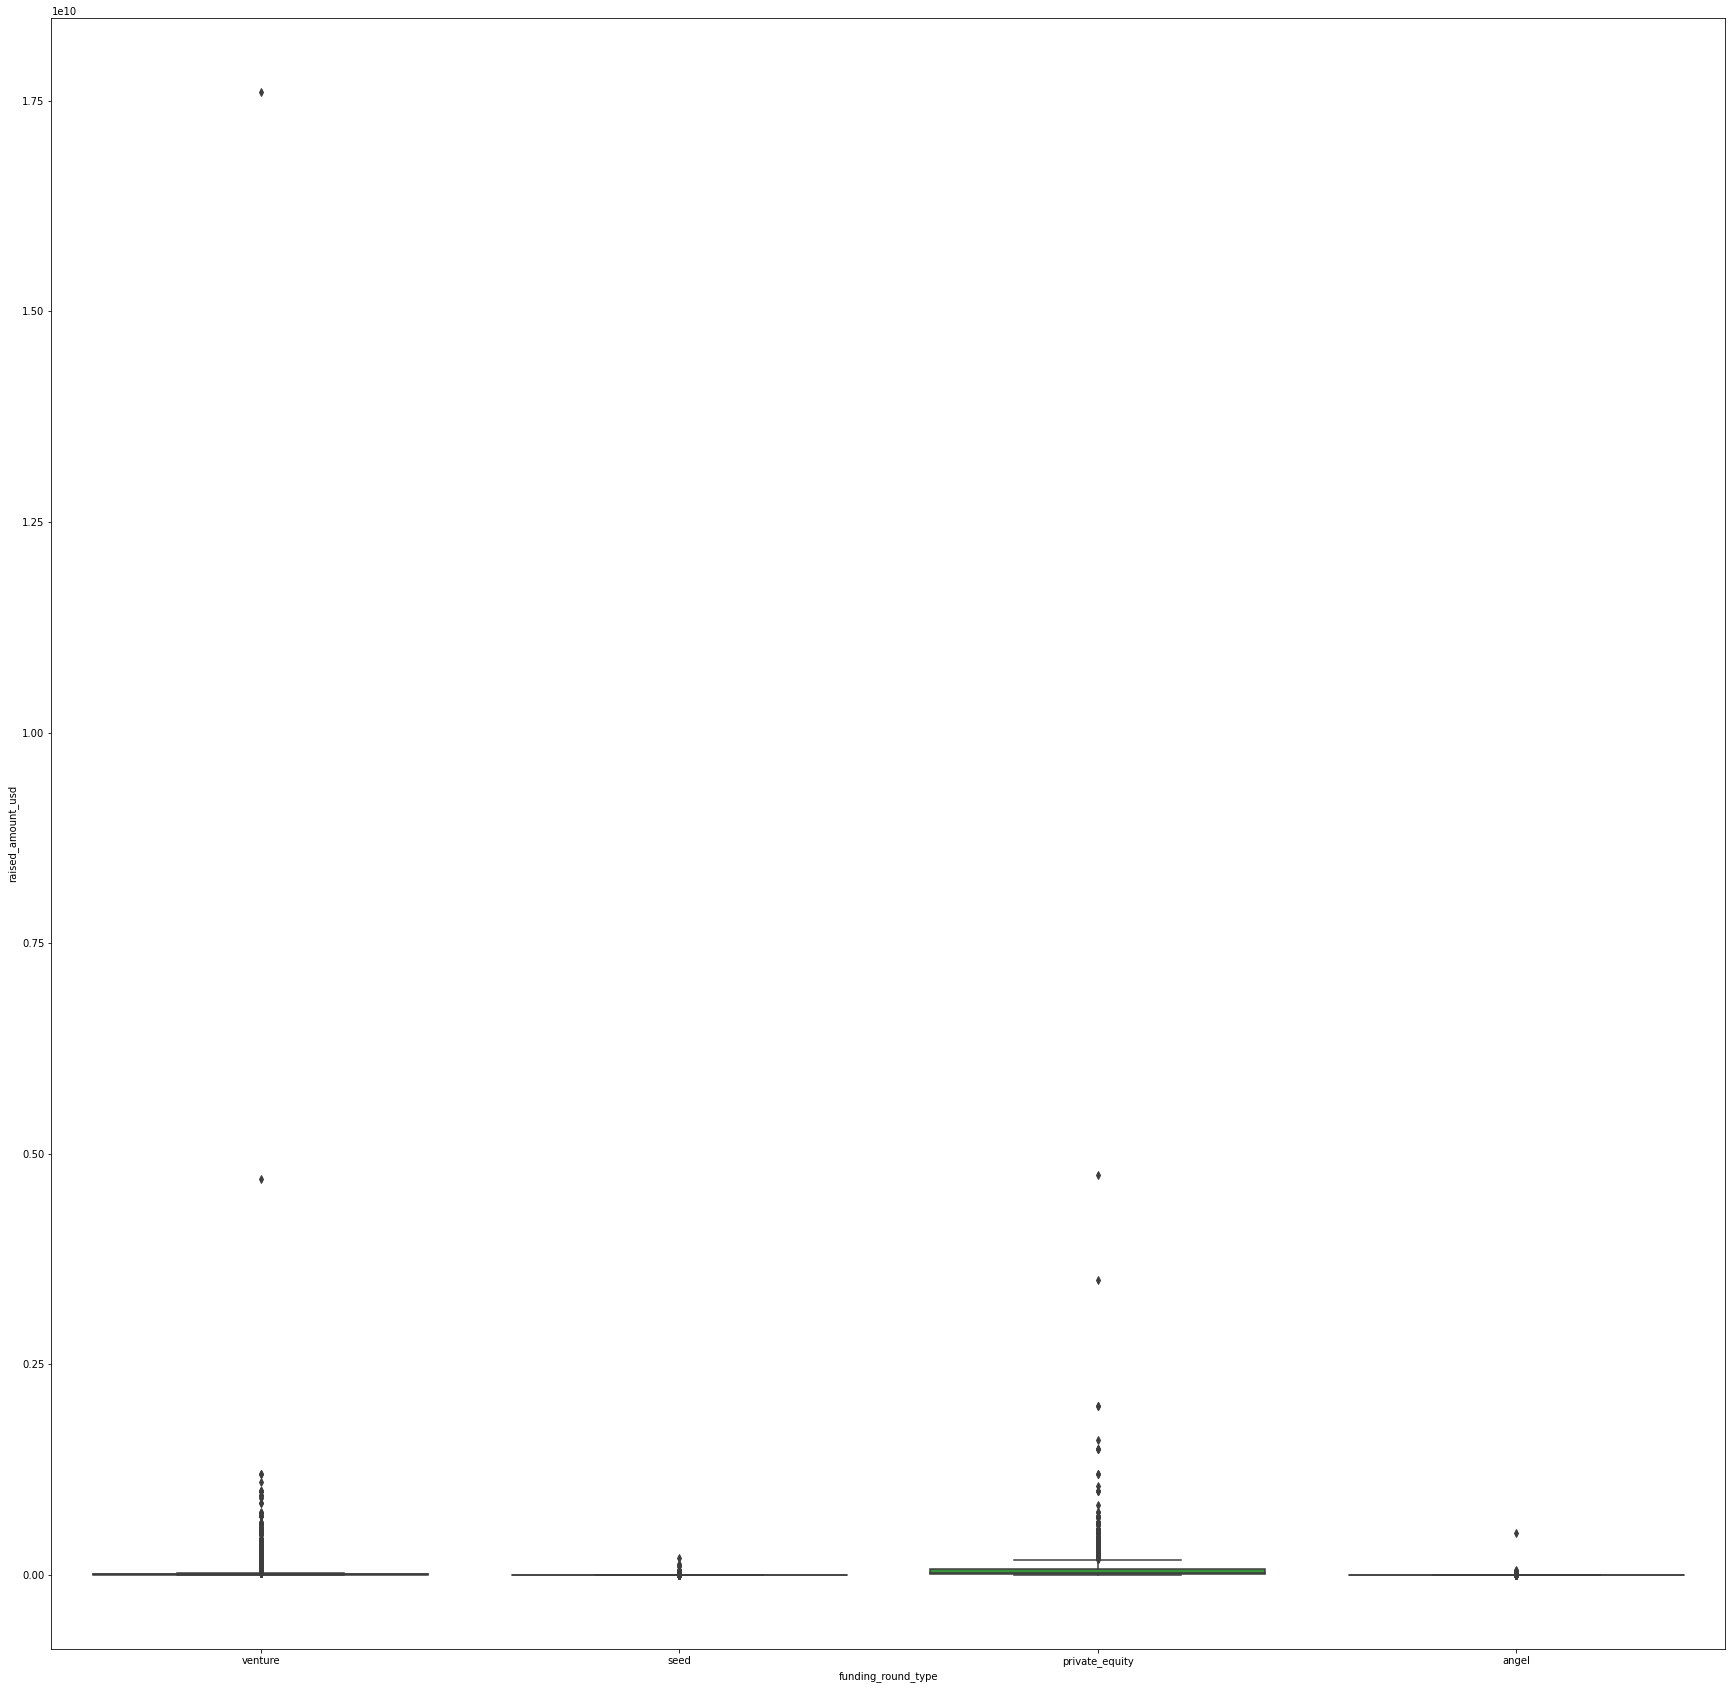

In [296]:
plt.figure(figsize=[30,30])
sns.boxplot(master_frame2.funding_round_type,master_frame2.raised_amount_usd)
plt.show()

In [318]:
# Removing some outliers
investment_ft = master_frame2[(master_frame2.raised_amount_usd < 170000000)]

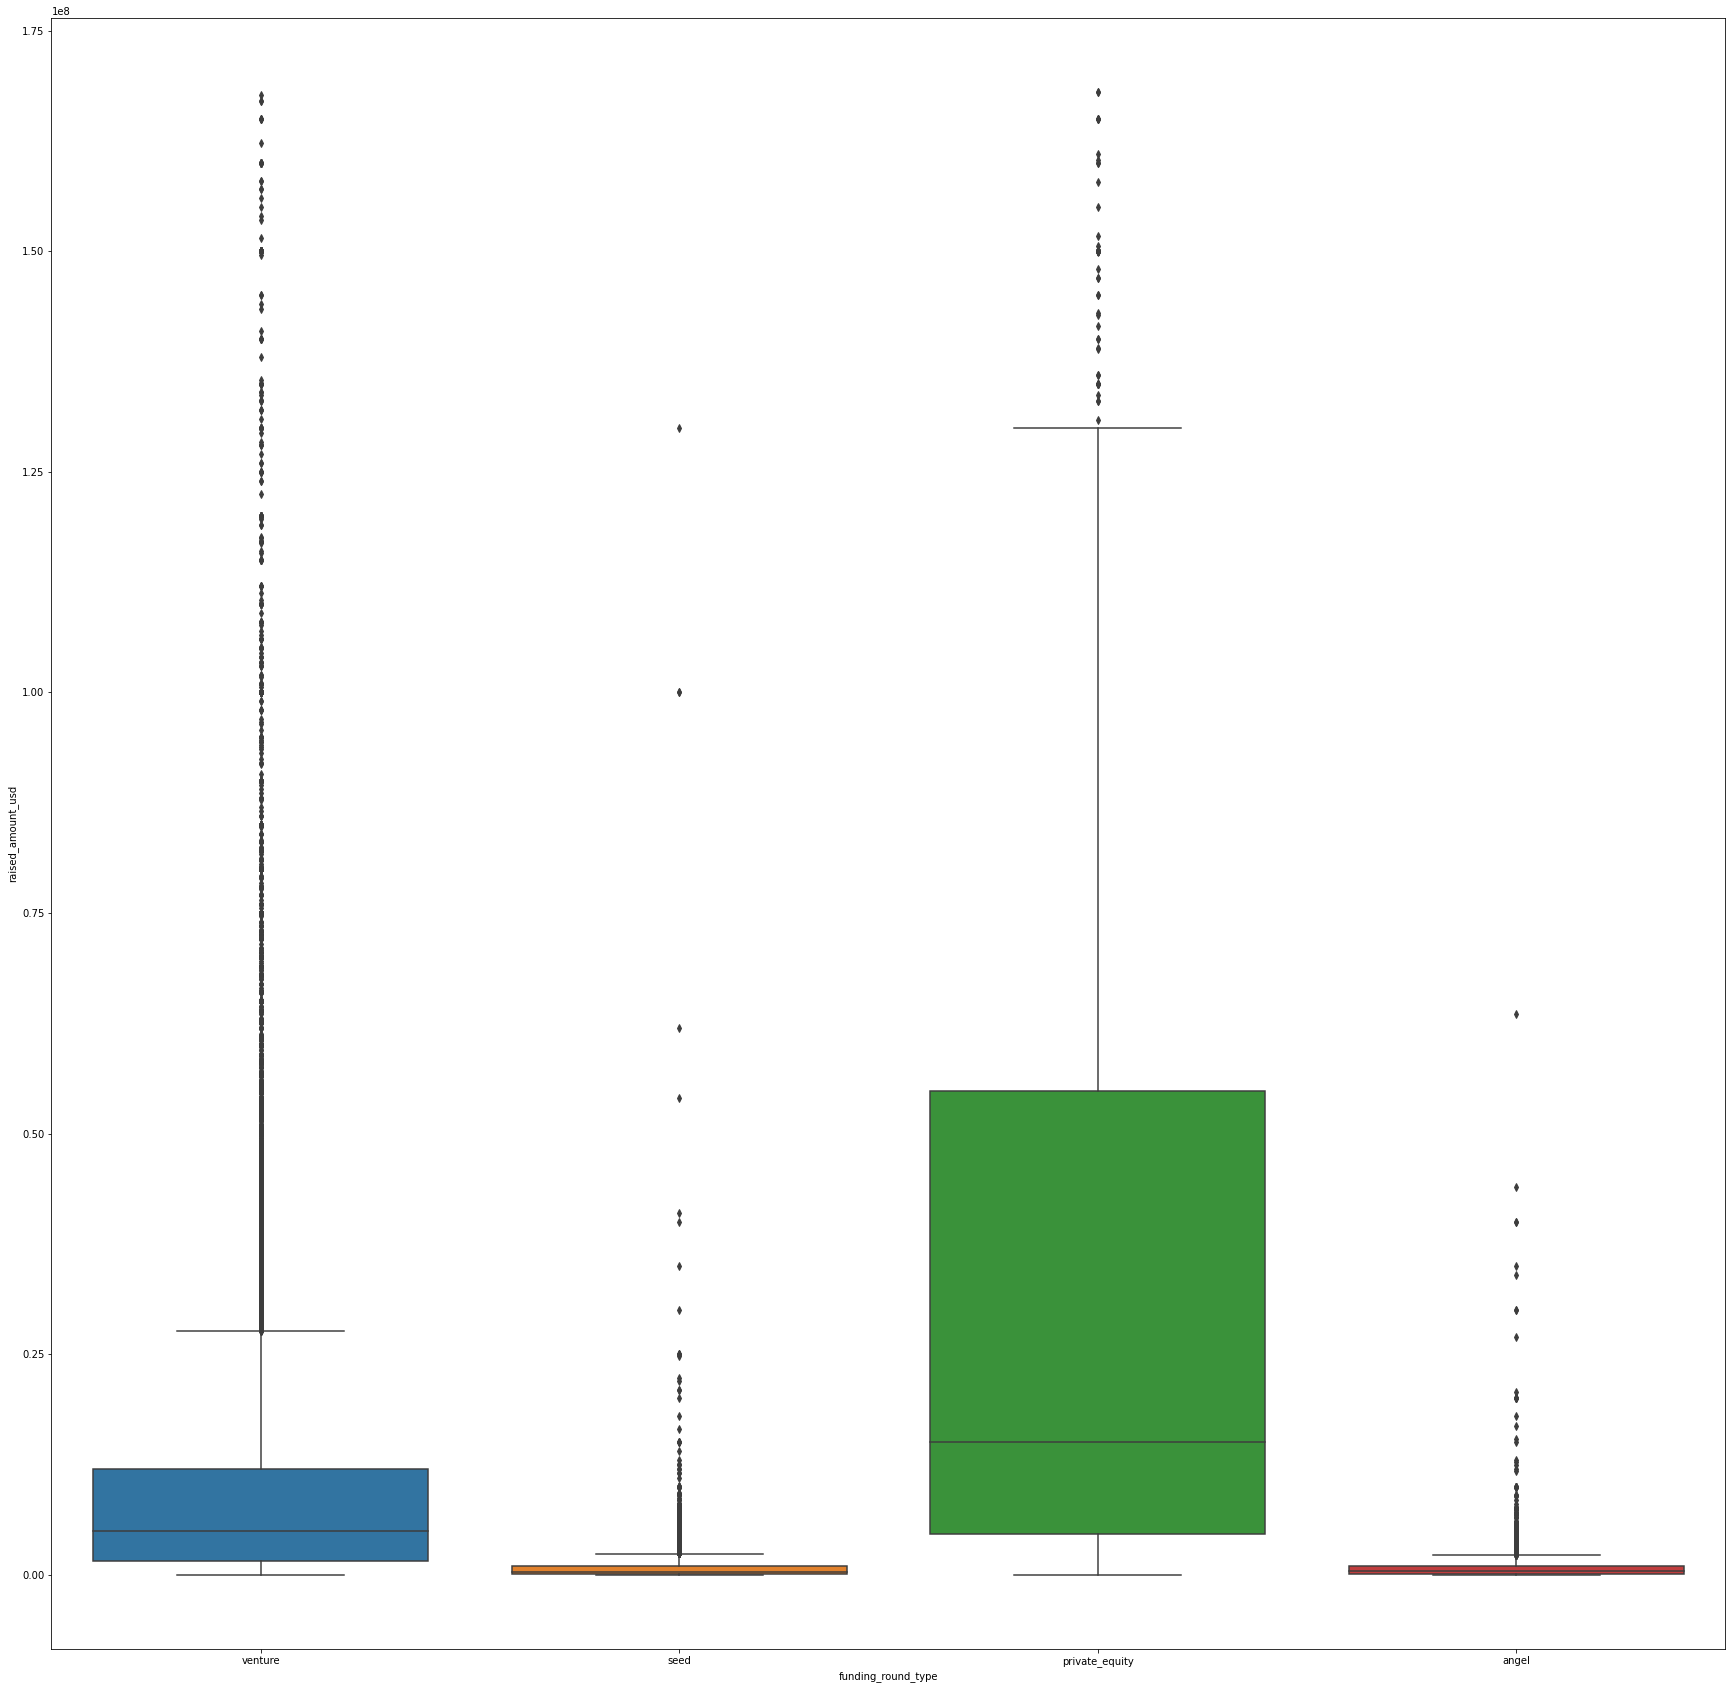

In [320]:
# Plot showing the representative amount of investment in each funding type
plt.figure(figsize=[30,30])
sns.boxplot(investment_ft.funding_round_type,investment_ft.raised_amount_usd)
plt.show()

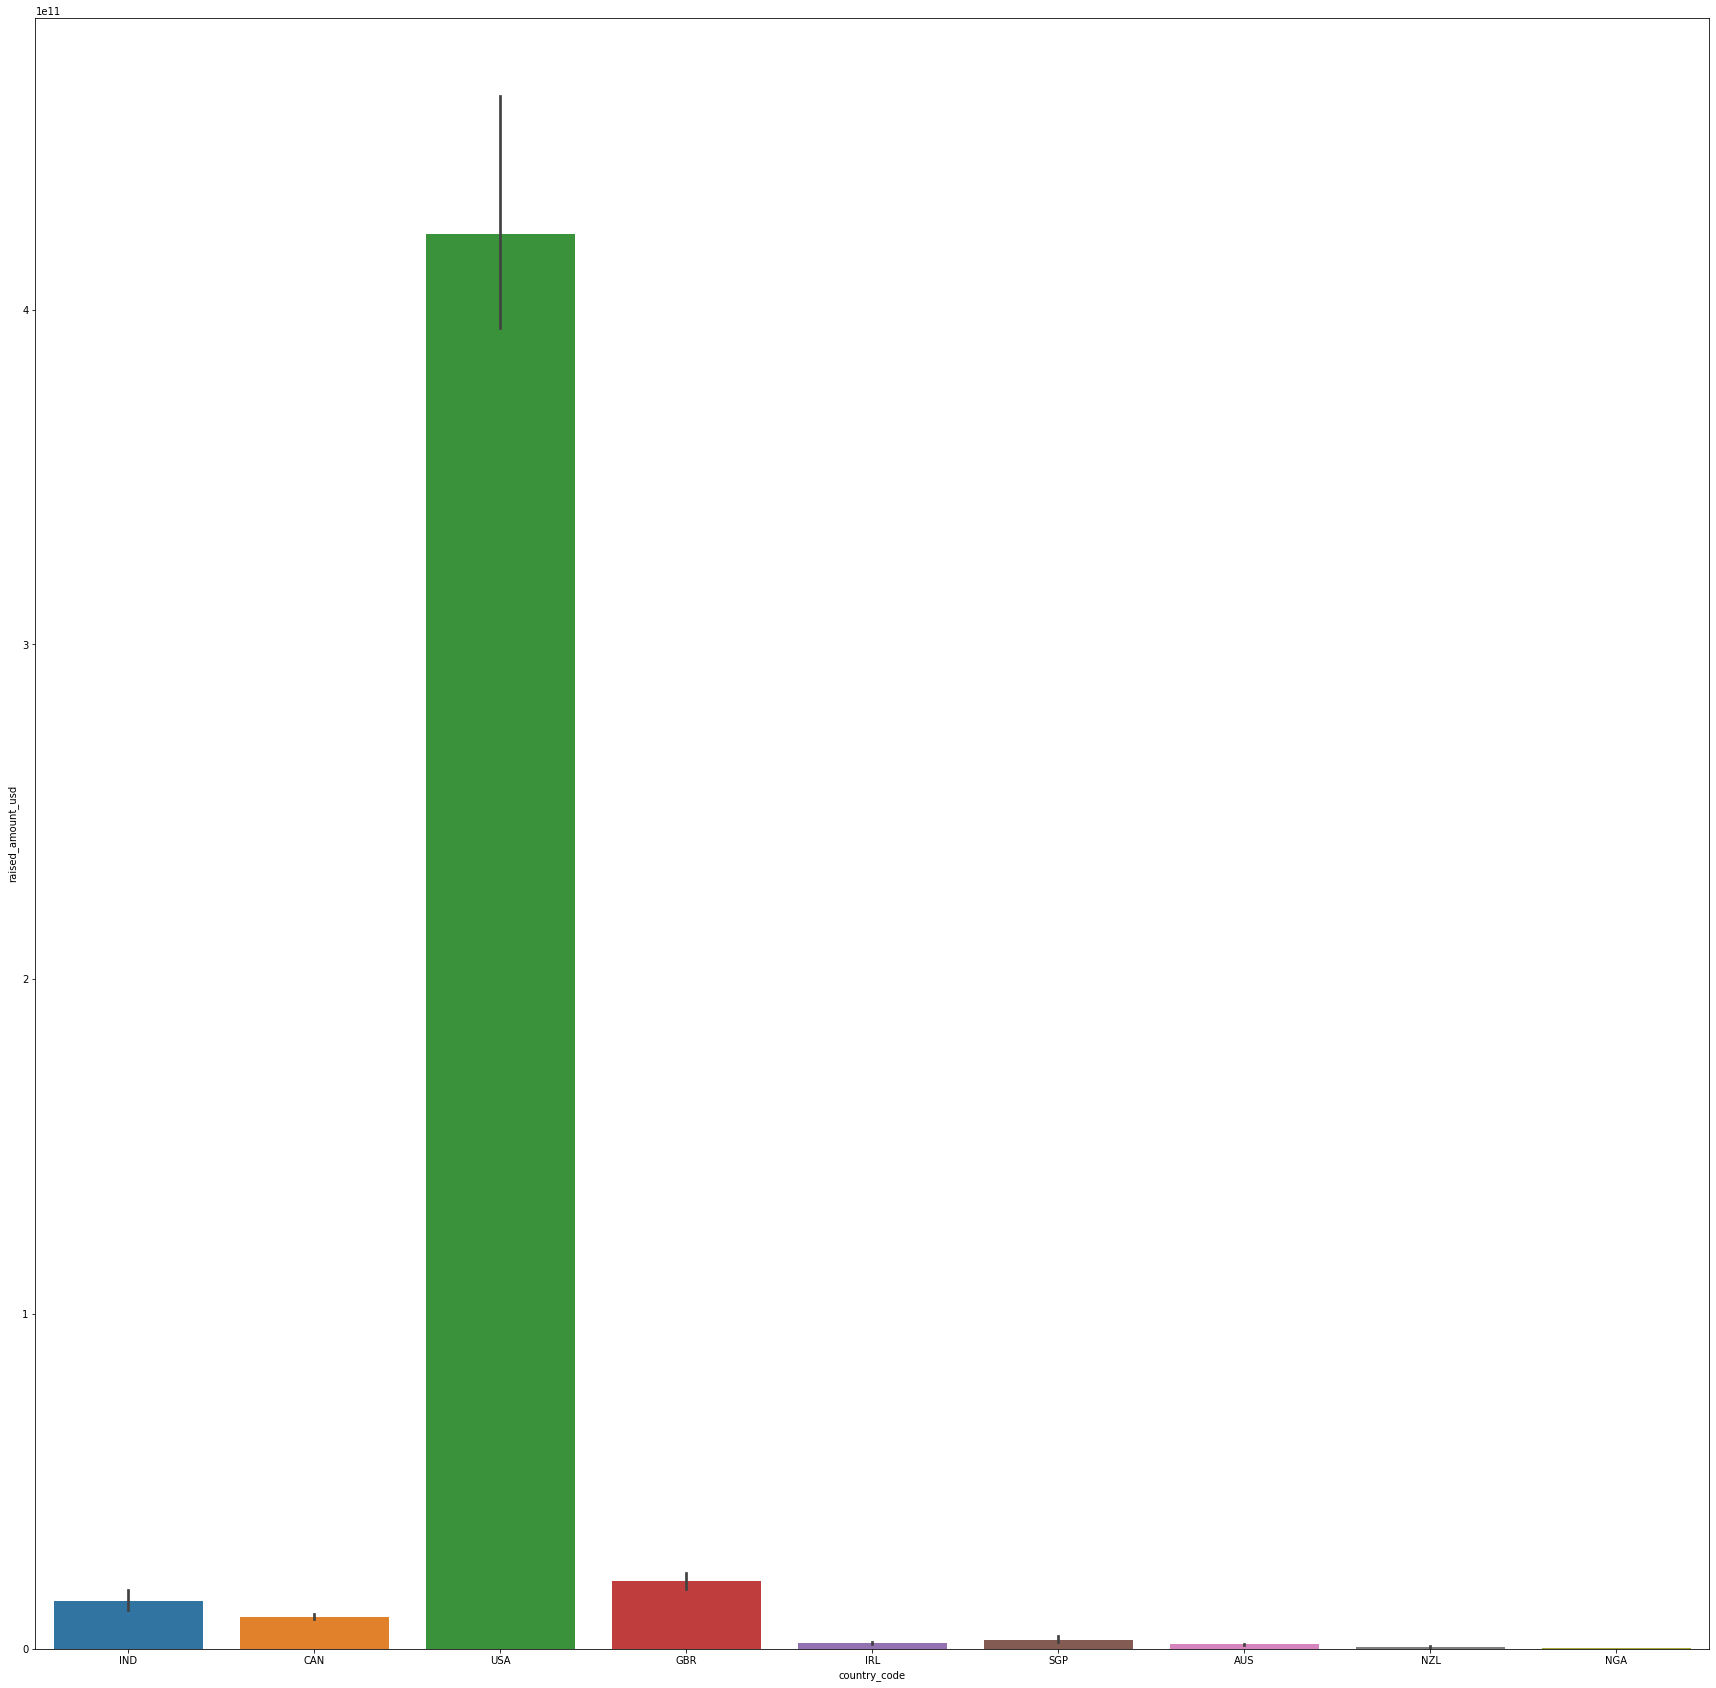

In [321]:
# Plot showing the top 9 countries against the total amount of investments of funding type FT
plt.figure(figsize=[30,30])
sns.barplot(data=top9, x="country_code", y="raised_amount_usd", estimator=sum)
plt.show()

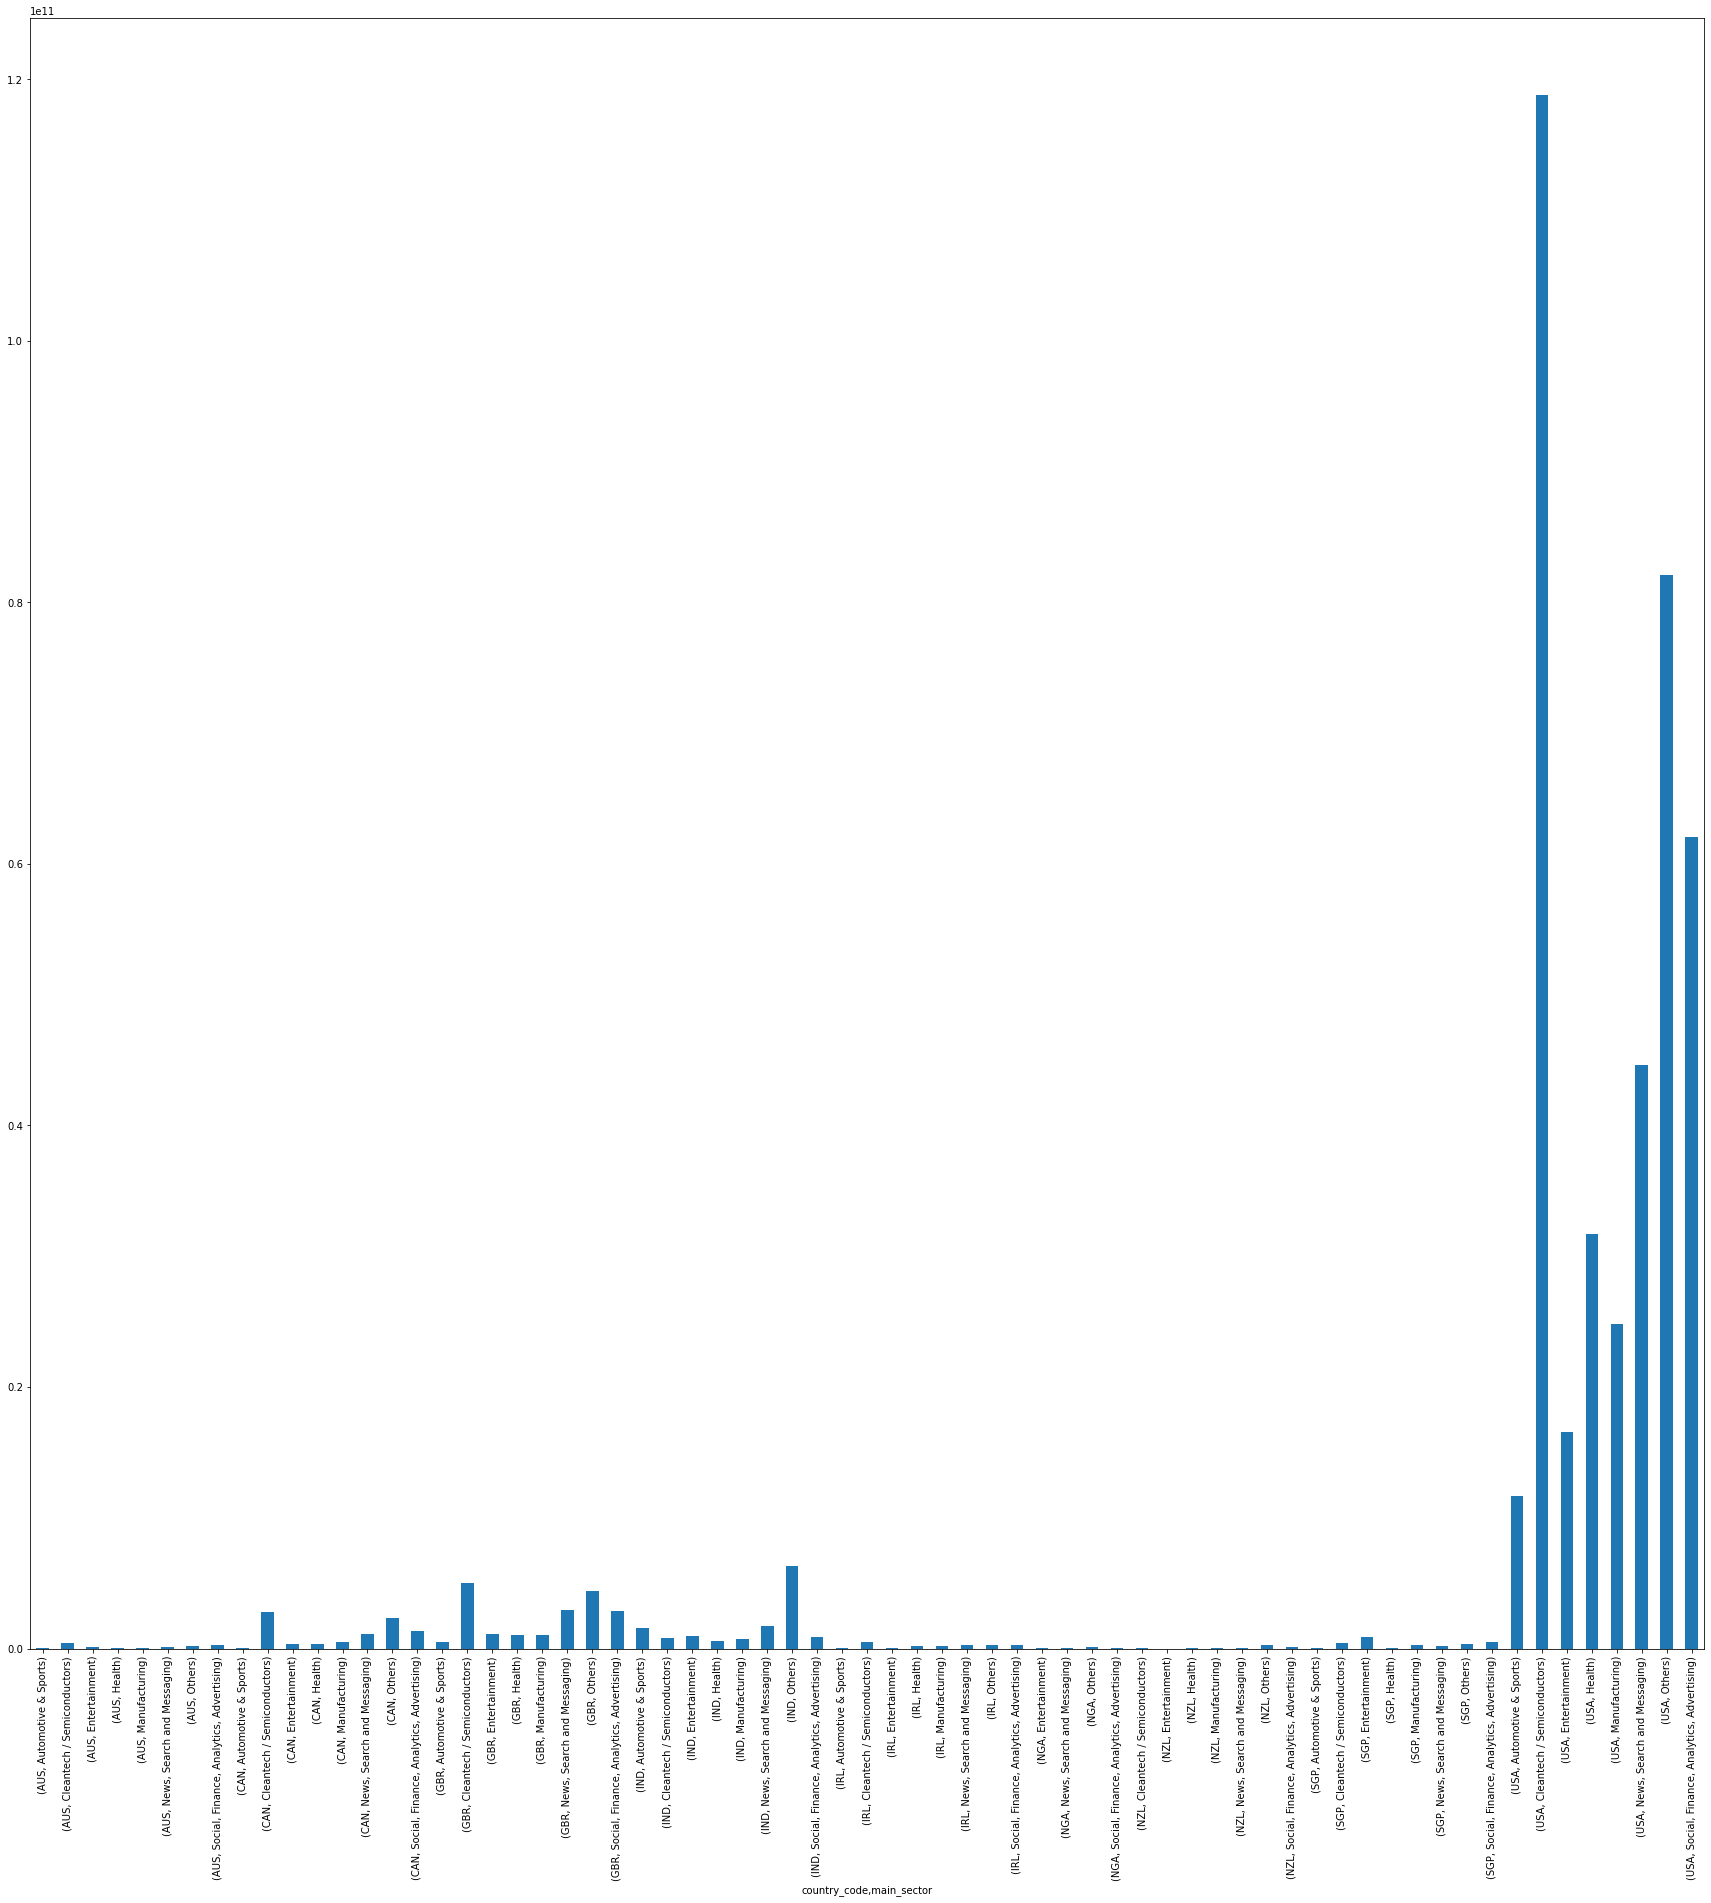

In [350]:
# Plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart for venture investment type. 
plt.figure(figsize=[30,30])
master.groupby(['country_code','main_sector'])['raised_amount_usd'].sum().plot.bar()
plt.show()